# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/cifar/cifar-10-python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:13, 12.6MB/s]                              


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 2:
Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Example of Image 3:
Image - Min Value: 4 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


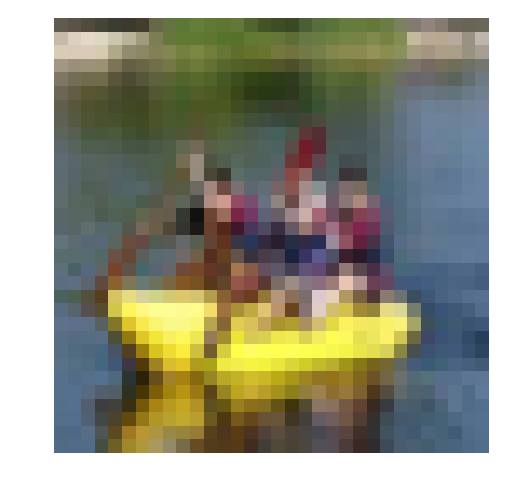

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 2
sample_id = 3
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1 (initially from 0 to 255).
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    norm_data = np.array(x)
    return (255 - norm_data) / 255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn.preprocessing import LabelBinarizer

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # Create the encoder object using the same mapping for labels [0,9], regardless of parameter x.
    encoder = LabelBinarizer()
    encoder.fit(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
    
    # Create np array from list
    labels_array = np.array(x)
        
    # Apply One-Hot Encoding    
    labels_array = encoder.transform(labels_array)
    
    # Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
    labels_array = labels_array.astype(np.float32)
    
    return labels_array


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [6]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    shape_param = (None,) + image_shape
    return tf.placeholder(dtype=tf.float32, shape=shape_param, name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(dtype=tf.float32, shape=(None, n_classes), name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(dtype=tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [7]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # weight needs the last dimension (i.e, the # of channels in the images) of input tensor.
    # The *tuple syntax expands the tuple elements into arguments.
    weight = tf.Variable(tf.truncated_normal([*conv_ksize, x_tensor.get_shape().as_list()[-1], conv_num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([conv_num_outputs], stddev=0.1))
    conv = tf.nn.conv2d(x_tensor, weight, strides=[1, *conv_strides, 1], padding='SAME')
    conv = tf.nn.bias_add(conv, bias)
    tf.nn.relu(conv)
    return tf.nn.max_pool(conv, ksize=[1, *pool_ksize, 1], strides=[1, *pool_strides, 1], padding='SAME')

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [8]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    flattened_size = 1
    # Multiply all the tensor dimensions together, except the batch size, which is the position zero in shape tuple
    for dim in x_tensor.get_shape()[1:].as_list():
        flattened_size *= dim
    return tf.reshape(x_tensor, [-1, flattened_size])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [9]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    flattened_size = x_tensor.get_shape().as_list()[-1]
    
    weight = tf.Variable(tf.truncated_normal([flattened_size, num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([num_outputs], stddev=0.1))
    con = tf.add(tf.matmul(x_tensor, weight), bias)
    return tf.nn.relu(con)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [10]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    weight = tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[-1], num_outputs], stddev=0.1))
    bias = tf.Variable(tf.truncated_normal([num_outputs], stddev=0.1))
    return tf.add(tf.matmul(x_tensor, weight), bias)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`.

In [11]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    print('\n\nInput shape: {}'.format(x.get_shape()))
    conv1 = conv2d_maxpool(x, conv_num_outputs = 32, conv_ksize = (2, 2), conv_strides = (1, 1), pool_ksize = (2,2), pool_strides = (2, 2)) 
    print('Convolution Layer 1 with Max Pooling shape: {}'.format(conv1.get_shape()))
    conv2 = conv2d_maxpool(conv1, conv_num_outputs = 64, conv_ksize = (2, 2), conv_strides = (1, 1), pool_ksize = (2,2), pool_strides = (2, 2))
    print('Convolution Layer 2 with Max Pooling shape: {}'.format(conv2.get_shape()))
    conv3 = conv2d_maxpool(conv2, conv_num_outputs = 128, conv_ksize = (2, 2), conv_strides = (1, 1), pool_ksize = (2,2), pool_strides = (2, 2))
    print('Convolution Layer 3 with Max Pooling shape: {}'.format(conv3.get_shape()))
    
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flat = flatten(conv3)
    print('Flatten Layer shape: {}'.format(flat.get_shape()))

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    con1 = fully_conn(flat, 2048)
    con1 = tf.nn.dropout(con1, keep_prob)
    print('Fully Connected Layer 1 shape: {}'.format(con1.get_shape()))
    con2 = fully_conn(con1, 1024)
    con2 = tf.nn.dropout(con2, keep_prob)
    print('Fully Connected Layer 2 shape: {}'.format(con2.get_shape()))
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    out = output(con2, 10)
    print('Output shape: {}'.format(out.get_shape()))
    
    # TODO: return output
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)



Input shape: (?, 32, 32, 3)
Convolution Layer 1 with Max Pooling shape: (?, 16, 16, 32)
Convolution Layer 2 with Max Pooling shape: (?, 8, 8, 64)
Convolution Layer 3 with Max Pooling shape: (?, 4, 4, 128)
Flatten Layer shape: (?, 2048)
Fully Connected Layer 1 shape: (?, 2048)
Fully Connected Layer 2 shape: (?, 1024)
Output shape: (?, 10)


Input shape: (?, 32, 32, 3)
Convolution Layer 1 with Max Pooling shape: (?, 16, 16, 32)
Convolution Layer 2 with Max Pooling shape: (?, 8, 8, 64)
Convolution Layer 3 with Max Pooling shape: (?, 4, 4, 128)
Flatten Layer shape: (?, 2048)
Fully Connected Layer 1 shape: (?, 2048)
Fully Connected Layer 2 shape: (?, 1024)
Output shape: (?, 10)
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [12]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={
                x: feature_batch,
                y: label_batch,
                keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [13]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # Calculate batch loss and accuracy
    loss = session.run(cost, feed_dict={
                x: feature_batch,
                y: label_batch,
                keep_prob: 1.0})
    valid_acc = sess.run(accuracy, feed_dict={
                x: valid_features,
                y: valid_labels,
                keep_prob: 1.0})
    print('Loss: {} Validation Accuracy: {}'.format(loss, valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [14]:
# TODO: Tune Parameters
epochs = 100
batch_size = 128
# We have chosen a fairly complex model architecture, so let's use a low keep probability to avoid overfitting.
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss: 1.817765474319458 Validation Accuracy: 0.38940000534057617
Epoch  2, CIFAR-10 Batch 1:  Loss: 1.6224507093429565 Validation Accuracy: 0.4365999698638916
Epoch  3, CIFAR-10 Batch 1:  Loss: 1.3827660083770752 Validation Accuracy: 0.476999968290329
Epoch  4, CIFAR-10 Batch 1:  Loss: 1.1682106256484985 Validation Accuracy: 0.5053999423980713
Epoch  5, CIFAR-10 Batch 1:  Loss: 1.0929120779037476 Validation Accuracy: 0.5175999402999878
Epoch  6, CIFAR-10 Batch 1:  Loss: 0.9136113524436951 Validation Accuracy: 0.5537999272346497
Epoch  7, CIFAR-10 Batch 1:  Loss: 0.8106734752655029 Validation Accuracy: 0.562999963760376
Epoch  8, CIFAR-10 Batch 1:  Loss: 0.6690276861190796 Validation Accuracy: 0.5879998803138733
Epoch  9, CIFAR-10 Batch 1:  Loss: 0.5604748725891113 Validation Accuracy: 0.5893998742103577
Epoch 10, CIFAR-10 Batch 1:  Loss: 0.48709118366241455 Validation Accuracy: 0.5913999080657959
Epoch 11, CIFAR-10

Epoch 86, CIFAR-10 Batch 1:  Loss: 2.3485168640036136e-05 Validation Accuracy: 0.626599907875061
Epoch 87, CIFAR-10 Batch 1:  Loss: 3.6098113923799247e-05 Validation Accuracy: 0.6297999620437622
Epoch 88, CIFAR-10 Batch 1:  Loss: 1.3979021787235979e-05 Validation Accuracy: 0.6393998861312866
Epoch 89, CIFAR-10 Batch 1:  Loss: 0.0017319321632385254 Validation Accuracy: 0.6291999220848083
Epoch 90, CIFAR-10 Batch 1:  Loss: 6.751008186256513e-05 Validation Accuracy: 0.6311998963356018
Epoch 91, CIFAR-10 Batch 1:  Loss: 6.198682513058884e-06 Validation Accuracy: 0.6273999214172363
Epoch 92, CIFAR-10 Batch 1:  Loss: 1.5747795259812847e-05 Validation Accuracy: 0.6365999579429626
Epoch 93, CIFAR-10 Batch 1:  Loss: 2.774536824290408e-06 Validation Accuracy: 0.6339999437332153
Epoch 94, CIFAR-10 Batch 1:  Loss: 2.202358018621453e-06 Validation Accuracy: 0.6311999559402466
Epoch 95, CIFAR-10 Batch 1:  Loss: 8.368553244508803e-05 Validation Accuracy: 0.6311999559402466
Epoch 96, CIFAR-10 Batch 1:

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss: 1.8097198009490967 Validation Accuracy: 0.3895999789237976
Epoch  1, CIFAR-10 Batch 2:  Loss: 1.6145873069763184 Validation Accuracy: 0.45419996976852417
Epoch  1, CIFAR-10 Batch 3:  Loss: 1.4202250242233276 Validation Accuracy: 0.4793999195098877
Epoch  1, CIFAR-10 Batch 4:  Loss: 1.3890835046768188 Validation Accuracy: 0.5115999579429626
Epoch  1, CIFAR-10 Batch 5:  Loss: 1.5024363994598389 Validation Accuracy: 0.5133999586105347
Epoch  2, CIFAR-10 Batch 1:  Loss: 1.3187342882156372 Validation Accuracy: 0.515999972820282
Epoch  2, CIFAR-10 Batch 2:  Loss: 1.2528396844863892 Validation Accuracy: 0.5311999320983887
Epoch  2, CIFAR-10 Batch 3:  Loss: 1.108533501625061 Validation Accuracy: 0.5615999102592468
Epoch  2, CIFAR-10 Batch 4:  Loss: 1.060787320137024 Validation Accuracy: 0.582599937915802
Epoch  2, CIFAR-10 Batch 5:  Loss: 1.1207518577575684 Validation Accuracy: 0.5823999643325806
Epoch  3, CIFAR-10 Batch 1:  Loss: 1.07119548320770

Epoch 18, CIFAR-10 Batch 3:  Loss: 0.01904168911278248 Validation Accuracy: 0.7379997968673706
Epoch 18, CIFAR-10 Batch 4:  Loss: 0.02251700684428215 Validation Accuracy: 0.742999792098999
Epoch 18, CIFAR-10 Batch 5:  Loss: 0.024609975516796112 Validation Accuracy: 0.7379998564720154
Epoch 19, CIFAR-10 Batch 1:  Loss: 0.01963241770863533 Validation Accuracy: 0.7307997941970825
Epoch 19, CIFAR-10 Batch 2:  Loss: 0.009521178901195526 Validation Accuracy: 0.7409998178482056
Epoch 19, CIFAR-10 Batch 3:  Loss: 0.016819924116134644 Validation Accuracy: 0.7371998429298401
Epoch 19, CIFAR-10 Batch 4:  Loss: 0.022591078653931618 Validation Accuracy: 0.7345998287200928
Epoch 19, CIFAR-10 Batch 5:  Loss: 0.010678199119865894 Validation Accuracy: 0.7421998381614685
Epoch 20, CIFAR-10 Batch 1:  Loss: 0.012848841026425362 Validation Accuracy: 0.7459998726844788
Epoch 20, CIFAR-10 Batch 2:  Loss: 0.01163574680685997 Validation Accuracy: 0.7437998652458191
Epoch 20, CIFAR-10 Batch 3:  Loss: 0.01933486

Epoch 35, CIFAR-10 Batch 3:  Loss: 0.0013325188774615526 Validation Accuracy: 0.7483998537063599
Epoch 35, CIFAR-10 Batch 4:  Loss: 0.0023335397709161043 Validation Accuracy: 0.7439998388290405
Epoch 35, CIFAR-10 Batch 5:  Loss: 0.0005619017174467444 Validation Accuracy: 0.7321998476982117
Epoch 36, CIFAR-10 Batch 1:  Loss: 0.0013255031080916524 Validation Accuracy: 0.7423998117446899
Epoch 36, CIFAR-10 Batch 2:  Loss: 0.0008532180218026042 Validation Accuracy: 0.7463998794555664
Epoch 36, CIFAR-10 Batch 3:  Loss: 0.000884196488186717 Validation Accuracy: 0.7467998266220093
Epoch 36, CIFAR-10 Batch 4:  Loss: 0.003883791621774435 Validation Accuracy: 0.7421997785568237
Epoch 36, CIFAR-10 Batch 5:  Loss: 0.0031593255698680878 Validation Accuracy: 0.7451998591423035
Epoch 37, CIFAR-10 Batch 1:  Loss: 0.0012650906573981047 Validation Accuracy: 0.7393998503684998
Epoch 37, CIFAR-10 Batch 2:  Loss: 0.001408754731528461 Validation Accuracy: 0.7399998903274536
Epoch 37, CIFAR-10 Batch 3:  Loss

Epoch 52, CIFAR-10 Batch 3:  Loss: 7.287239714059979e-05 Validation Accuracy: 0.7439998984336853
Epoch 52, CIFAR-10 Batch 4:  Loss: 0.0008369893184863031 Validation Accuracy: 0.740199863910675
Epoch 52, CIFAR-10 Batch 5:  Loss: 0.0012002014555037022 Validation Accuracy: 0.7417998313903809
Epoch 53, CIFAR-10 Batch 1:  Loss: 0.001387156662531197 Validation Accuracy: 0.7455998063087463
Epoch 53, CIFAR-10 Batch 2:  Loss: 0.0004496907058637589 Validation Accuracy: 0.7377998232841492
Epoch 53, CIFAR-10 Batch 3:  Loss: 0.00017345146625302732 Validation Accuracy: 0.7389998435974121
Epoch 53, CIFAR-10 Batch 4:  Loss: 0.0003577956813387573 Validation Accuracy: 0.7421997785568237
Epoch 53, CIFAR-10 Batch 5:  Loss: 0.0001952541060745716 Validation Accuracy: 0.7467998266220093
Epoch 54, CIFAR-10 Batch 1:  Loss: 0.0013272329233586788 Validation Accuracy: 0.7493999004364014
Epoch 54, CIFAR-10 Batch 2:  Loss: 0.00021624029614031315 Validation Accuracy: 0.7409998774528503
Epoch 54, CIFAR-10 Batch 3:  L

Epoch 69, CIFAR-10 Batch 3:  Loss: 3.4314041840843856e-05 Validation Accuracy: 0.7433997988700867
Epoch 69, CIFAR-10 Batch 4:  Loss: 0.00027853454230353236 Validation Accuracy: 0.7351998686790466
Epoch 69, CIFAR-10 Batch 5:  Loss: 0.0004965830012224615 Validation Accuracy: 0.7445998191833496
Epoch 70, CIFAR-10 Batch 1:  Loss: 4.268658813089132e-05 Validation Accuracy: 0.7419998645782471
Epoch 70, CIFAR-10 Batch 2:  Loss: 4.899420673609711e-05 Validation Accuracy: 0.7463997602462769
Epoch 70, CIFAR-10 Batch 3:  Loss: 0.00044680459541268647 Validation Accuracy: 0.7409998774528503
Epoch 70, CIFAR-10 Batch 4:  Loss: 6.766998558305204e-05 Validation Accuracy: 0.7393999099731445
Epoch 70, CIFAR-10 Batch 5:  Loss: 8.122921281028539e-05 Validation Accuracy: 0.7453998327255249
Epoch 71, CIFAR-10 Batch 1:  Loss: 0.0005418601795099676 Validation Accuracy: 0.7349998950958252
Epoch 71, CIFAR-10 Batch 2:  Loss: 0.0008319651824422181 Validation Accuracy: 0.744799792766571
Epoch 71, CIFAR-10 Batch 3: 

Epoch 86, CIFAR-10 Batch 2:  Loss: 2.025683716055937e-05 Validation Accuracy: 0.7495998740196228
Epoch 86, CIFAR-10 Batch 3:  Loss: 1.340425296803005e-05 Validation Accuracy: 0.7463998794555664
Epoch 86, CIFAR-10 Batch 4:  Loss: 0.00010772526729851961 Validation Accuracy: 0.7501997947692871
Epoch 86, CIFAR-10 Batch 5:  Loss: 5.259738099994138e-05 Validation Accuracy: 0.7377998232841492
Epoch 87, CIFAR-10 Batch 1:  Loss: 0.0005114173982292414 Validation Accuracy: 0.7469998002052307
Epoch 87, CIFAR-10 Batch 2:  Loss: 0.00011862941755680367 Validation Accuracy: 0.747799813747406
Epoch 87, CIFAR-10 Batch 3:  Loss: 1.3365415725274943e-05 Validation Accuracy: 0.7421998977661133
Epoch 87, CIFAR-10 Batch 4:  Loss: 2.4675869099155534e-06 Validation Accuracy: 0.7485998272895813
Epoch 87, CIFAR-10 Batch 5:  Loss: 1.2136932127759792e-05 Validation Accuracy: 0.741199791431427
Epoch 88, CIFAR-10 Batch 1:  Loss: 0.0007389129023067653 Validation Accuracy: 0.7469998598098755
Epoch 88, CIFAR-10 Batch 2:

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.7305181962025317



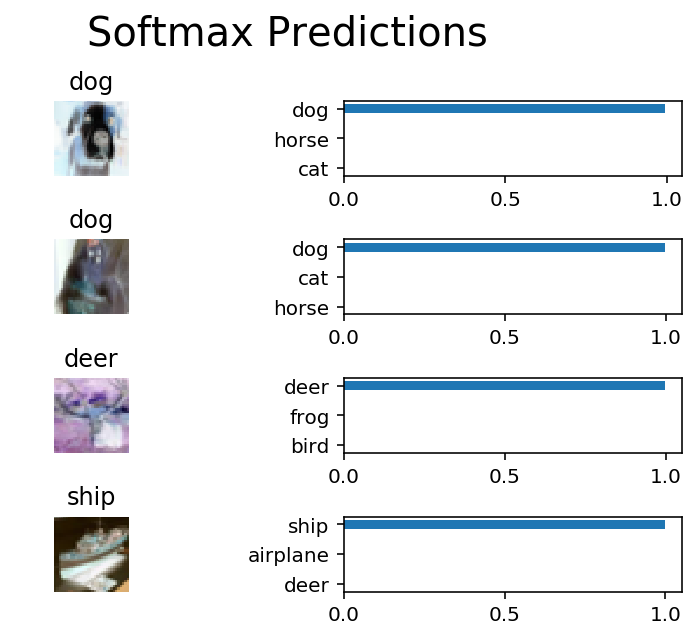

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.